In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


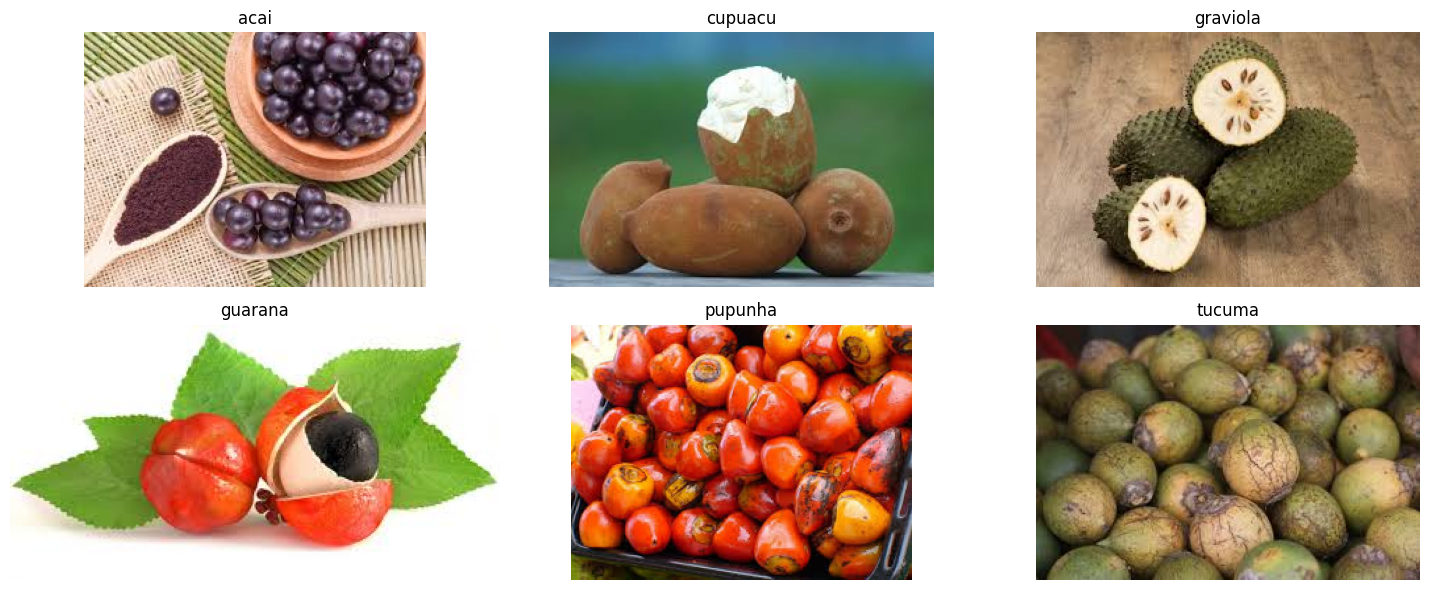

In [3]:
# 1. Load and visualize images from a dataset stored in directories,
# Define the path to the training dataset
train_dir = "/content/drive/MyDrive/AI level6/FruitinAmazon/FruitinAmazon/test"

# Get the list of class directories
class_names = sorted(os.listdir(train_dir))

# Set up figure for displaying images
num_classes = len(class_names)
fig, axes = plt.subplots(2, (num_classes + 1) // 2, figsize=(15, 6)) # Two rows
axes = axes.flatten()

# Select one image randomly from each class and display
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = mpimg.imread(img_path)  # Read image
    axes[i].imshow(img)  # Display image
    axes[i].set_title(class_name)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
corrupted_images = []  # List to store corrupted image paths

# Iterate through each class subdirectory
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)   # Try opening the image
            img.verify()   # Verify if the image is valid
        except (IOError, SyntaxError):
            corrupted_images.append(img_path)  # Add to corrupted list
            os.remove(img_path)   # Remove the corrupted image
            print(f"Removed corrupted image: {img_path}")

# Print message
if not corrupted_images:
    print("No corrupted images found.")

No corrupted images found.


In [ ]:
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)   # Normalize pixel values to [0,1]

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Automatically infer labels from folder names
    label_mode='int',   # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to 128x128
    interpolation='nearest',  # Resizing method
    batch_size=batch_size,  # Number of samples per batch
    shuffle=True,  # Shuffle the training data
    validation_split=validation_split,  # Split data into training and validation sets
    subset='training',  # Use the training subset
    seed=123  # Set a random seed for reproducibility
)

# Apply the normalization (Rescaling) to the training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load the validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',  # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to 128x128
    interpolation='nearest',  # Resizing method
    batch_size=batch_size,  # Number of samples per batch
    shuffle=False,  # Do not shuffle the validation data
    validation_split=validation_split,  # Split data into training and validation sets
    subset='validation',  # Use the validation subset
    seed=123  # Set a random seed for reproducibility
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.
Using 24 files for training.
Found 30 files belonging to 6 classes.
Using 6 files for validation.
